<a href="https://colab.research.google.com/github/Somu112/NLP/blob/main/Crypto_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Oct  5 12:56:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
## Prepare NLTK
# intentionally we are downloading all the packages etc available in NLTK. 
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [3]:
# installing Vader sentiment 
!pip install -q vaderSentiment

     |████████████████████████████████| 125 kB 6.6 MB/s 


In [4]:
# We would be using TweePy library to interact with Twitter --> using our Keys. 
import tweepy

# Regular libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# in this use case we would use NLTK library. 
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
stop = stopwords.words('english') # variable to store the list of Eng language stop words !! 

# we would make use of VADER sentiment analysis. 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import nltk

# There may be cases of regular expression filtering. 
import re
import matplotlib.pyplot as plt

# Visualization : other than Matplotlib we would also make use of wordcloud. 
from matplotlib.cm import Reds, Greens, Purples, Greys
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [5]:
import time

In [6]:
# Hide unwanted warnings. 
import warnings
warnings.filterwarnings('ignore')

In [7]:
ACCESS_TOKEN = '23----390-cdQ0Uhl----------oynjG8bX0WSG======'
ACCESS_SECRET = '8fq===iRT----DQPaRVB---------5QTXPHGt3cO'
CONSUMER_KEY = 'SAoYFU4CkPhc-------bX6'
CONSUMER_SECRET = '2223DKOri----------------05iCLKRve'

# Setup access to API
def connect_to_twitter_OAuth():
  """
  Function is to setup the API to hit Twitter with our access keys
  So that we can easily download the data. 
  """
  # creating an authentication variable
  # by this way, Twitter identifies who we are. 
  auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
  
  # To get access to the data, we need to set the Access tokens as well !! 
  auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
  
  # Finally use Tweepy to setup the Auth
  api = tweepy.API(auth)
  
  # Finally the function should return the API handle
  return api

# Create API object --> using the predefined function. 
api = connect_to_twitter_OAuth()

**Getting Tweets from different crypto currencies**

In [8]:
# Assuming that we now have a running API key, let's create a set of #hashtags 
# we will use these hashtags to identify the data which we need. 
crypto_list={'@ethereum','@litecoin','@Tether_to','@dogecoin','@Polkadot','@btc'}

In [9]:
# Array to hold tweet data
tweet_list = []

# Iterate through all the crypto_list
for crypto in crypto_list: # for each #hashtags or @mentions 
    # Bring out the 200 tweets
    crypto_tweets = api.user_timeline(crypto, count=200)
    
    # sleep time is to "fool" Twitter that we are not a Robot/Hacker! 
    time.sleep(1) 

    # Loop through the 200 tweets
    for tweet in crypto_tweets:
        tweet_id = tweet.id # unique integer identifier for tweet
        text = tweet.text # utf-8 text of tweet
        favorite_count = tweet.favorite_count
        retweet_count = tweet.retweet_count
        created_at = tweet.created_at # utc time tweet created
        source = tweet.source # utility used to post tweet
        reply_to_status = tweet.in_reply_to_status_id # if reply int of orginal tweet id
        reply_to_user = tweet.in_reply_to_screen_name # if reply original tweetes screenname
        retweets = tweet.retweet_count # number of times this tweet retweeted
        favorites = tweet.favorite_count # number of time this tweet liked
        
        # append attributes to list
        tweet_list.append({'crypto':crypto,
                          'tweet_id':tweet_id, 
                          'text':text, 
                          'favorite_count':favorite_count,
                          'retweet_count':retweet_count,
                          'created_at':created_at, 
                          'source':source, 
                          'reply_to_status':reply_to_status, 
                          'reply_to_user':reply_to_user,
                          'retweets':retweets,
                          'favorites':favorites})
        

In [10]:
# let's check the RAW data. 
tweet_list

[{'created_at': datetime.datetime(2021, 10, 5, 6, 5),
  'crypto': '@ethereum',
  'favorite_count': 0,
  'favorites': 0,
  'reply_to_status': None,
  'reply_to_user': None,
  'retweet_count': 46,
  'retweets': 46,
  'source': 'Twitter Web App',
  'text': "RT @ethdotorg: We've rethought how we translate content, allowing us to translate https://t.co/v9gxnMUQFz into more languages quicker than…",
  'tweet_id': 1445268768582782976},
 {'created_at': datetime.datetime(2021, 10, 3, 22, 21, 58),
  'crypto': '@ethereum',
  'favorite_count': 0,
  'favorites': 0,
  'reply_to_status': None,
  'reply_to_user': None,
  'retweet_count': 140,
  'retweets': 140,
  'source': 'Twitter Web App',
  'text': 'RT @jcksie: Merge event, day 1: @ethnimbus and @nethermindeth does #themerge transition! https://t.co/eyRlygTMbV',
  'tweet_id': 1444789853175099394},
 {'created_at': datetime.datetime(2021, 10, 3, 20, 59, 17),
  'crypto': '@ethereum',
  'favorite_count': 0,
  'favorites': 0,
  'reply_to_status': None,


In [11]:
# because dictionaries would be a bit tough for us to later on convert/process/analyze/etc. 
# hence we are converting the dict./JSON downloaded from Twitter as a Dataframe!! 
tweet_data=pd.DataFrame(tweet_list)

In [12]:
# Let's check the first 5 entries. 
tweet_data.head()

,crypto,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favorites
0,@ethereum,1445268768582782976,RT @ethdotorg: We've rethought how we translat...,0,46,2021-10-05 06:05:00,Twitter Web App,NaN,None,46,0
1,@ethereum,1444789853175099394,"RT @jcksie: Merge event, day 1: @ethnimbus and...",0,140,2021-10-03 22:21:58,Twitter Web App,NaN,None,140,0
2,@ethereum,1444769043144192003,RT @WeekInEthNews: ⟠ Latest Week in Ethereum N...,0,51,2021-10-03 20:59:17,Twitter Web App,NaN,None,51,0
3,@ethereum,1444570620583464966,RT @TimBeiko: Another @ethereum #AllCoreDevs t...,0,55,2021-10-03 07:50:49,Twitter Web App,NaN,None,55,0
4,@ethereum,1443992501464018948,RT @ethdotorg: In order to get more eyes on th...,0,99,2021-10-01 17:33:35,Twitter Web App,NaN,None,99,0


In [13]:
tweet_data.shape

(1199, 11)

In [14]:
# Optionally: save the downloaded dataframe version of Twitter data once to disk. 
tweet_data.to_csv('Tweets.csv',index=None)

# **EDA**

In [15]:
# Best practice: before any data cleaning exercise we should ALWAYS create a copy of the dataframe. 
data=tweet_data.copy()

In [16]:
# Checking the data source. 
source=data.source.value_counts()

In [17]:
# Using the source column, which is a reference to the device (probably) which the users have 
# used to write/enter the data in Twitter, we'll perform some visualizations using Plotly. 

# basic definition of a Pie Chart
trace=go.Pie(labels=source.index,
             values=source,
             showlegend=False,
             hole=0.33,
             text=[str(round(i*100,3))+'%' for i in source/sum(source)],
             hovertext='Source',
             hoverinfo='label+text',textinfo='text+label'
            )

# create the final layout and print/display the visualization. 
layout=go.Layout(title="Which Device People are using?")
fig=go.Figure(data=[trace],layout=layout)
fig.show()

**Most Retweets and Favorites**

In [18]:
# take the source data and aggregate the records by Retweet count and Fav. count. 
source=data.groupby('crypto').agg(sum)[['retweet_count','favorite_count']]

In [19]:
# Simple bar plot for comparison. 
fig=go.Figure()
fig.add_bar(x=source.index,y=source.retweet_count,name='Retweet Count')
fig.add_bar(x=source.index,y=source.favorite_count,name='Favorite Count')

**Most used Hashtags**

In [20]:
# define a function to extract hashtags since to collect the data we have primarily used mentions. 
def hashtag_extract(x):
    hashtags = []
    ht = re.findall(r"#(\w+)", x)
    hashtags.extend(ht)
    if hashtags==[]:
        return ''
    return hashtags

In [21]:
# using inline code to find hashtags out of existing dataframe from TEXT column. 
tags=[hashtag_extract(x) for  x in data.text]

In [22]:
# Create a list of tags that we have found from the data. 
all_tags=[]
for tag in tags:
    if tag!='':
        all_tags.extend(tag)

In [23]:
# let's check all tags
print(all_tags)

['themerge', 'AllCoreDevs', 'Eth2', 'Ethereum', 'AllCoreDevs', 'ETHOnline', 'Ethereum', 'Ethereum', 'Et', 'AllCoreDevs', 'ETHOnline', 'HyperledgerBesu', 'eth2', 'Lodestar', 'Devcon', 'Ethereum', 'Devcon', 'Ethereum', 'Cryptocurency', 'Crypto', 'AlllCoreDevs', 'Ethereum', 'Ethereum', 'ethereum', 'Ethereum', 'AllCoreDevs', 'Ethereum', 'Ethereum', 'Ethereum', 'AllCoreDevs', 'RoadToDevcon', '3', 'Ethereum', 'Ethereum', 'Ethereum', 'ethereum', 'Ethereum', 'HackMoney2021', 'AllCoreDevs', 'Ethereum', 'upgrade', 'blockchain', 'DeFi', 'HackMoney2021', 'Ethereum', 'AllCoreDevs', '2', 'Eth2', 'Ethe', 'Ethereum', 'AllCoreDevs', 'Eth2', 'Devcon', 'Tether', 'tether', 'Finance', 'News', 'Tether', 'Tether', 'PolyNetwork', 'Tether', 'crypto', 'stablecoins', 'tether', 'tether', 'PolyNetwork', 'crypto', 'Tether', 'PolyNetwork', 'DeFi', 'tether', 'tether', 'bitcoin', 'tether', 'Bitfinex', 'Tether', 'Tether', 'Tether', 'Tether', 'Tether', 'Tether', 'BMI', 'BridgeMutual', 'Tether', 'Tether', 'Tether', 'teth

In [24]:
# creating a dictionary basis the distinct values of tags. 
tags_vc={tag:0 for tag in set(all_tags)}

In [25]:
# for each tweet find the tag and increment the count in an output list. 
for tweet in data.text:
    ht = re.findall(r"#(\w+)", tweet)
    if ht!=[]:
        for tag in ht:
            tags_vc[tag]+=1

In [26]:
# final sorted dictionary where we store the set of tags along with # of times they were used
tags_vc_sorted=dict(sorted(tags_vc.items(),key= lambda x:x[1],reverse=True))

In [27]:
# let's check the outcome
tags_vc_sorted

{'1doge1dog': 1,
 '2': 1,
 '3': 1,
 '4': 1,
 '401k': 1,
 'AllCoreDevs': 8,
 'AlllCoreDevs': 1,
 'America': 1,
 'Androidgames': 1,
 'BMI': 1,
 'BTCTimes': 1,
 'Bitcoin': 111,
 'BitcoinDay': 1,
 'Bitfinex': 4,
 'BridgeMutual': 1,
 'BridgeTheDeFide': 2,
 'Bristol': 1,
 'Chainlink': 1,
 'Chikun': 1,
 'Circuitsuperstars': 1,
 'Coinoftheday': 1,
 'Crypto': 2,
 'Cryptocurency': 1,
 'Cryptocurrencies': 1,
 'DAOs': 4,
 'DOGE': 2,
 'DeFi': 5,
 'Decentralized': 1,
 'Devcon': 3,
 'DigiByte': 1,
 'Distributed': 1,
 'DoOnlyGoodEverday': 1,
 'DoOnlyGoodEveryday': 3,
 'Dog': 1,
 'Doge': 1,
 'DogeDay': 1,
 'Dogecoin': 29,
 'DogecoinToTheMoon': 2,
 'Dogecoinarmy': 1,
 'ETHOnline': 2,
 'Et': 1,
 'Eth2': 3,
 'Ethe': 1,
 'Ether': 1,
 'Ethereum': 21,
 'Everyday': 1,
 'FIGHTNIGHT': 1,
 'FairLaunch': 1,
 'Finance': 1,
 'Frida': 1,
 'FridayMorning': 1,
 'GME': 1,
 'GameWithLitecoin': 1,
 'HackMoney2021': 2,
 'HyperledgerBesu': 1,
 'Indianapolis': 1,
 'InternationalDogDay': 1,
 'JustKidding': 1,
 'KLV': 1,
 'Kl

**Cleaning the Tweet Data**

Removing user handle

In [28]:
# removing user handle and the Retweet tag (which Twitter automatically adds in the text)
data['tidy_tweet'] = data['text'].replace(to_replace ='(@[\w]+)', value ='', regex = True) 
data['tidy_tweet'] = data['tidy_tweet'].replace(to_replace =('RT'), value ='',regex = True) 

In [29]:
# Before
tweet_data['text'][:2]

0    RT @ethdotorg: We've rethought how we translat...
1    RT @jcksie: Merge event, day 1: @ethnimbus and...
Name: text, dtype: object

In [30]:
# After
data['tidy_tweet'][:2]

0     : We've rethought how we translate content, a...
1     : Merge event, day 1:  and  does #themerge tr...
Name: tidy_tweet, dtype: object

In [31]:
# relook at the dataframe
data.head()

,crypto,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favorites,tidy_tweet
0,@ethereum,1445268768582782976,RT @ethdotorg: We've rethought how we translat...,0,46,2021-10-05 06:05:00,Twitter Web App,NaN,None,46,0,": We've rethought how we translate content, a..."
1,@ethereum,1444789853175099394,"RT @jcksie: Merge event, day 1: @ethnimbus and...",0,140,2021-10-03 22:21:58,Twitter Web App,NaN,None,140,0,": Merge event, day 1: and does #themerge tr..."
2,@ethereum,1444769043144192003,RT @WeekInEthNews: ⟠ Latest Week in Ethereum N...,0,51,2021-10-03 20:59:17,Twitter Web App,NaN,None,51,0,: ⟠ Latest Week in Ethereum News!\n\n🕺 Top M...
3,@ethereum,1444570620583464966,RT @TimBeiko: Another @ethereum #AllCoreDevs t...,0,55,2021-10-03 07:50:49,Twitter Web App,NaN,None,55,0,: Another #AllCoreDevs today ✅\n\nAgenda: ht...
4,@ethereum,1443992501464018948,RT @ethdotorg: In order to get more eyes on th...,0,99,2021-10-01 17:33:35,Twitter Web App,NaN,None,99,0,: In order to get more eyes on the changes co...


**Remove any links from the tweet**

In [32]:
# remove any links from the tweet: Links not required for performing sentiment analysis.
data['tidy_tweet'] = data['tidy_tweet'].str.replace('((www\.[\s]+)|(https?://[^\s]+))','\0',regex=True)

In [33]:
# Before
tweet_data['text'][3]

'RT @TimBeiko: Another @ethereum #AllCoreDevs today ✅\n\nAgenda: https://t.co/0uMg8aET1T\nStream (only ~40 mins!): https://t.co/27NUwUw9JX \n\nRe…'

In [34]:
# After
data['tidy_tweet'][3]

' : Another  #AllCoreDevs today ✅\n\nAgenda: \x00\nStream (only ~40 mins!): \x00 \n\nRe…'

**Remove special characters, numbers, punctuations:**

In [35]:
# remove special characters, numbers, punctuations: None of them would add any value to the sentiment score.
data['tidy_tweet'] = data['tidy_tweet'].str.replace("[^a-zA-Z]+", " ")

In [36]:
data['tidy_tweet'][0]

' We ve rethought how we translate content allowing us to translate into more languages quicker than '

In [37]:
tweet_data.text[0]

"RT @ethdotorg: We've rethought how we translate content, allowing us to translate https://t.co/v9gxnMUQFz into more languages quicker than…"

**Tokenizing and removing Stop Words¶**

In [38]:
# check the list of eng lang stop words!
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [39]:
# Perform tokenization (for this we will need the words in lower case & without being a stop word) 

# convert into lower case
data["tidy_tweet"] = data["tidy_tweet"].str.lower()

# split the words by space --> the most easy way to perform tokenization. 
data["tidy_tweet"] = data["tidy_tweet"].str.split()

# Finally, we are applying a lambda function to only keep the words which are not stop words!!! 
data['tidy_tweet']=data['tidy_tweet'].apply(lambda x: [item for item in x if item not in stop])

In [40]:
# Before 
data.text[0]

"RT @ethdotorg: We've rethought how we translate content, allowing us to translate https://t.co/v9gxnMUQFz into more languages quicker than…"

In [41]:
# After
data['tidy_tweet'][0]

['rethought',
 'translate',
 'content',
 'allowing',
 'us',
 'translate',
 'languages',
 'quicker']

In [42]:
# Alternate Method: Using TweetTokenizer to tokenize the tweet

# create an object of this Class. 
tt = TweetTokenizer()

# let's take an example tweet 
s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"

# can we automatically tokenize. 
tt.tokenize(s0)

['This',
 'is',
 'a',
 'cooool',
 '#dummysmiley',
 ':',
 ':-)',
 ':-P',
 '<3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '->',
 '<--']

In [43]:
# in our previous output, we saw that the tokens are now converted into a list and not a string. 
# hence every token is divided as an individual entity per row. 
# let's fix this and convert the tokens back into a str. 

def rejoin_words(row):
    my_list = row['tidy_tweet']
    joined_words = ( " ".join(my_list))
    return joined_words

# let's apply that on the clean dataframe
data['tidy_tweet'] = data.apply(rejoin_words, axis=1)


In [44]:
# once the cleaning is done --> 
data['tidy_tweet'][0]

'rethought translate content allowing us translate languages quicker'

**Applying Lemmatization**

In [45]:
# apply the lemmatization and also use additional tokenizers. 

# var for taking each word in each tweet and tokenize them before we lemmatize them
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

# var is for actual lemmatization process. 
lemmatizer = nltk.stem.WordNetLemmatizer()

# create a reusable function. 
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

# lets apply the UDF to the clean tweet data. 
data['tidy_tweet'] = data['tidy_tweet'].apply(lemmatize_text)

In [46]:
# back to the lemmatized version of tokens. 
data['tidy_tweet']

0       [rethought, translate, content, allowing, u, t...
1               [merge, event, day, themerge, transition]
2       [latest, week, ethereum, news, top, moment, nf...
3       [another, allcoredevs, today, agenda, stream, ...
4       [order, get, eye, change, coming, altair, upgr...
                              ...                        
1194    [miami, mayor, francis, suarez, aim, turn, mun...
1195    [price, grayscale, bitcoin, trust, gbtc, recen...
1196                             [retrospect, inevitable]
1197    [tesla, accepts, bitcoin, new, payment, option...
1198    [opinion, final, fight, upon, u, bitcoin, stru...
Name: tidy_tweet, Length: 1199, dtype: object

In [47]:
# finally look into the dataframe columns. 
data.head()

,crypto,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favorites,tidy_tweet
0,@ethereum,1445268768582782976,RT @ethdotorg: We've rethought how we translat...,0,46,2021-10-05 06:05:00,Twitter Web App,NaN,None,46,0,"[rethought, translate, content, allowing, u, t..."
1,@ethereum,1444789853175099394,"RT @jcksie: Merge event, day 1: @ethnimbus and...",0,140,2021-10-03 22:21:58,Twitter Web App,NaN,None,140,0,"[merge, event, day, themerge, transition]"
2,@ethereum,1444769043144192003,RT @WeekInEthNews: ⟠ Latest Week in Ethereum N...,0,51,2021-10-03 20:59:17,Twitter Web App,NaN,None,51,0,"[latest, week, ethereum, news, top, moment, nf..."
3,@ethereum,1444570620583464966,RT @TimBeiko: Another @ethereum #AllCoreDevs t...,0,55,2021-10-03 07:50:49,Twitter Web App,NaN,None,55,0,"[another, allcoredevs, today, agenda, stream, ..."
4,@ethereum,1443992501464018948,RT @ethdotorg: In order to get more eyes on th...,0,99,2021-10-01 17:33:35,Twitter Web App,NaN,None,99,0,"[order, get, eye, change, coming, altair, upgr..."


In [48]:
# again we will require a function to rejoin the tokens
def rejoin_words(row):
    my_list = row['tidy_tweet']
    joined_words = ( " ".join(my_list))
    return joined_words

# apply this once more to the tidy tweet col. 
data['tidy_tweet'] = data.apply(rejoin_words, axis=1)

In [49]:
# after the processing the data looks like --> 
data['tidy_tweet']

0       rethought translate content allowing u transla...
1                     merge event day themerge transition
2       latest week ethereum news top moment nfts prop...
3             another allcoredevs today agenda stream min
4       order get eye change coming altair upgrade bou...
                              ...                        
1194    miami mayor francis suarez aim turn municipali...
1195    price grayscale bitcoin trust gbtc recently fa...
1196                                retrospect inevitable
1197    tesla accepts bitcoin new payment option curre...
1198    opinion final fight upon u bitcoin struggle en...
Name: tidy_tweet, Length: 1199, dtype: object

In [50]:
data.head()

,crypto,tweet_id,text,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favorites,tidy_tweet
0,@ethereum,1445268768582782976,RT @ethdotorg: We've rethought how we translat...,0,46,2021-10-05 06:05:00,Twitter Web App,NaN,None,46,0,rethought translate content allowing u transla...
1,@ethereum,1444789853175099394,"RT @jcksie: Merge event, day 1: @ethnimbus and...",0,140,2021-10-03 22:21:58,Twitter Web App,NaN,None,140,0,merge event day themerge transition
2,@ethereum,1444769043144192003,RT @WeekInEthNews: ⟠ Latest Week in Ethereum N...,0,51,2021-10-03 20:59:17,Twitter Web App,NaN,None,51,0,latest week ethereum news top moment nfts prop...
3,@ethereum,1444570620583464966,RT @TimBeiko: Another @ethereum #AllCoreDevs t...,0,55,2021-10-03 07:50:49,Twitter Web App,NaN,None,55,0,another allcoredevs today agenda stream min
4,@ethereum,1443992501464018948,RT @ethdotorg: In order to get more eyes on th...,0,99,2021-10-01 17:33:35,Twitter Web App,NaN,None,99,0,order get eye change coming altair upgrade bou...


**Function for Cleaning**

Below is an example of effectively using Python functions to pipeline all the activities which we plan to do with the data.

In [51]:
# This will only be used in for single tweet
# in this cell, we have copied + pasted all the reusable functions we have used in the entire notebook!! 
def rejoin_words_text(row):
    my_list = row['Text']
    joined_words = ( " ".join(my_list))
    return joined_words

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

def cleanText(text):
    text = pd.DataFrame({'Orig':[text]})
    text['Text'] = text.Orig.replace(to_replace ='(@[\w]+)', value ='', regex = True) 
    text.Text = text.Text.replace(to_replace =('RT'), value ='',regex = True) 
    text.Text = text.Text.str.replace('((www\.[\s]+)|(https?://[^\s]+))','\0',regex=True)
    text.Text = text.Text.str.replace("[^a-zA-Z]+", " ")
    text.Text = text.Text.str.lower()
    text.Text = text.Text.str.split()
    text.Text = text.Text.apply(lambda x: [item for item in x if item not in stop])
    text.Text = text.apply(rejoin_words_text, axis=1)
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    text.Text = text.Text.apply(lemmatize_text)
    text.Text = text.apply(rejoin_words_text, axis=1)
    return text.Text[0]

**Check the Sentiment using VADER**

In [52]:
# object of sentiment Intensity analysis class (reusable)
analyzer = SentimentIntensityAnalyzer()

In [53]:
# expected output from the VADER sentiment analyzer 
# each value (in form of key-pairs) will contain a fraction number 
out={'neg':[],'neu':[],'pos':[],'compound':[]}

In [54]:
# looping through the range of data.
# for each tweet we calculate the sentiment intensity! 
# The calculations are already done in the VADER sentiment analyzer library. 
for i in range(data.shape[0]):
    vader_out=analyzer.polarity_scores(data.tidy_tweet[i])
    for key in vader_out.keys():
        out[key].append(vader_out[key])

In [55]:
# create the output in our predefined out variable
for key in out.keys():
    data[key]=out[key]

In [56]:
# look at the output
print(out)

{'neg': [0.0, 0.0, 0.0, 0.0, 0.147, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.168, 0.0, 0.0, 0.252, 0.0, 0.0, 0.0, 0.0, 0.281, 0.0, 0.0, 0.151, 0.0, 0.0, 0.202, 0.0, 0.0, 0.0, 0.124, 0.0, 0.0, 0.0, 0.0, 0.111, 0.14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.111, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.175, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12, 0.0, 0.0, 0.0, 0.14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.113, 0.0, 0.115, 0.0, 0.0, 0.0, 0.0, 0.0, 0.327, 0.0, 0.0, 0.0, 0.0, 0.115, 0.0, 0.0, 0.0, 0.073, 0.0, 0.0, 0.108, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.231, 0.0, 0.231, 0.309, 0.0, 0.252, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.098, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.113, 0.0, 0.0, 0.0, 0.0, 0.122, 0.0, 0.0, 0.0, 0.0, 0.187, 0.167

In [57]:
# take reference code of the previous EDA/Visual that we did for source of the tweet 
# and add later on the sentiment polarity value with it. 
source=data.groupby('crypto').agg('mean')

In [58]:
# visualization of sources by the sentiment
fig=go.Figure()
for crypto in data.crypto.unique():
    fig.add_bar(x=['Negative','Neutral','Positive','Compound'],
                y=list(source[source.index==crypto][out.keys()].values[0]),name=crypto)
fig.update_layout(title='Average Sentiment Across type of cryptocurrencies')
fig.show()

**Wordcloud based on the hashtags**

In [59]:
# function to create a word cloud. 
def word_cloud(wd_list,color):
    plt.figure(figsize=(10,15))
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(max_font_size=None,
                          stopwords=stopwords, 
                          background_color='#fcf4ee', 
                          collocations=False,
                          colormap =color,
                          width=750, 
                          height=750).generate(all_words)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [60]:
# what keys do we have for our sentiment output? 
print(out.keys())

dict_keys(['neg', 'neu', 'pos', 'compound'])


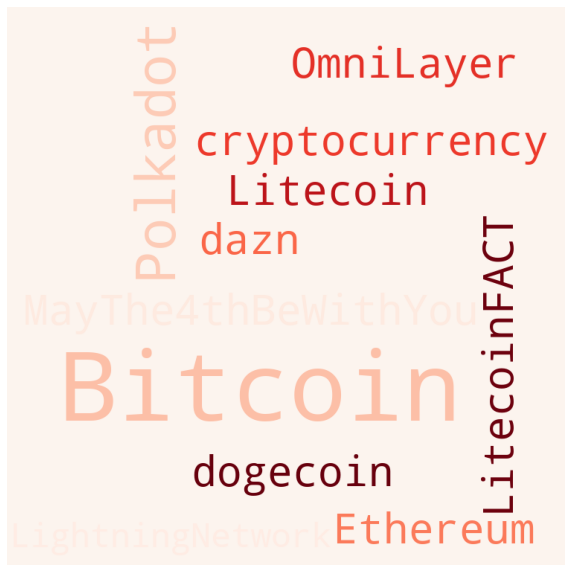

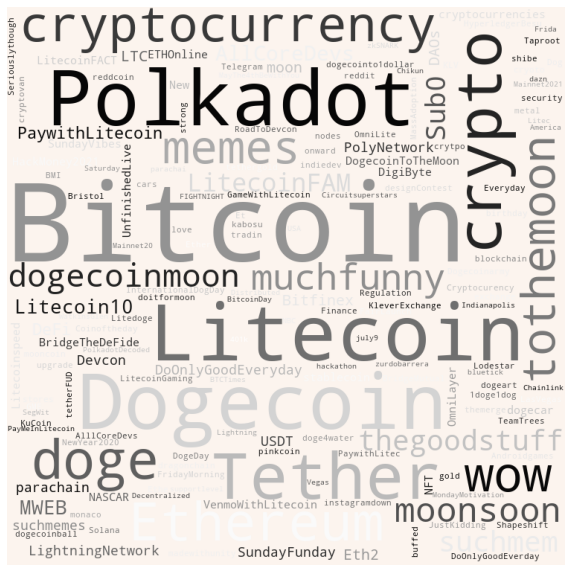

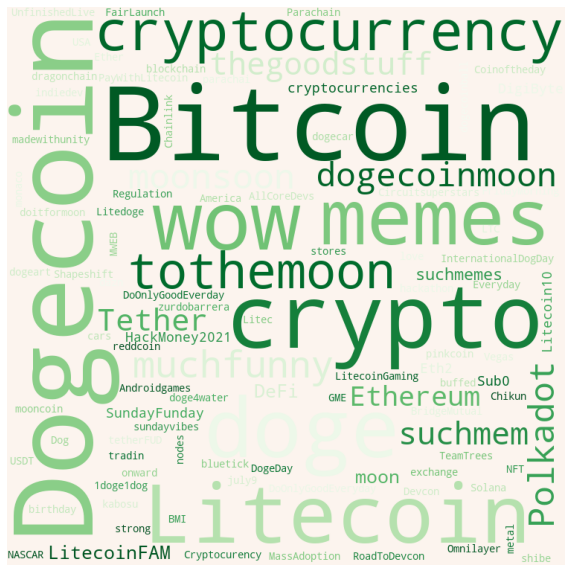

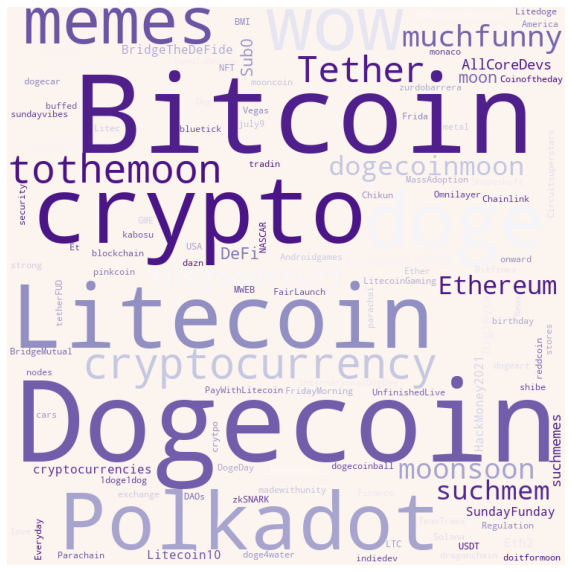

In [61]:
# for each sentiment that we have calculated 
for key in out.keys():
    pos_tags = data['text'][data[key]>0.2].apply(hashtag_extract) # not part of speech, just portion of speech 
    sentiment_tags=[]
    for tag in pos_tags:
        if tag!='':
            sentiment_tags.extend(tag)
    color={'neg':Reds,'pos':Greens,'neu':Greys,'compound':Purples}
    word_cloud(sentiment_tags,color[key])